In [1]:
%matplotlib widget

In [2]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from utils import *

In [3]:
f = lambda x: with_grad(x ** 2)

In [4]:
x = torch.linspace(-10, 10, 500)

In [5]:
y = []
dy_dx = []
for point in x:
    point.requires_grad_(True)
    y.append(f(point))
    dy_dx.append(point.grad)

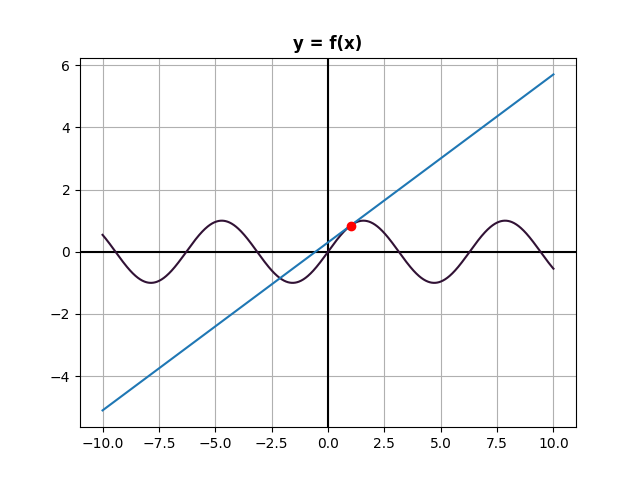

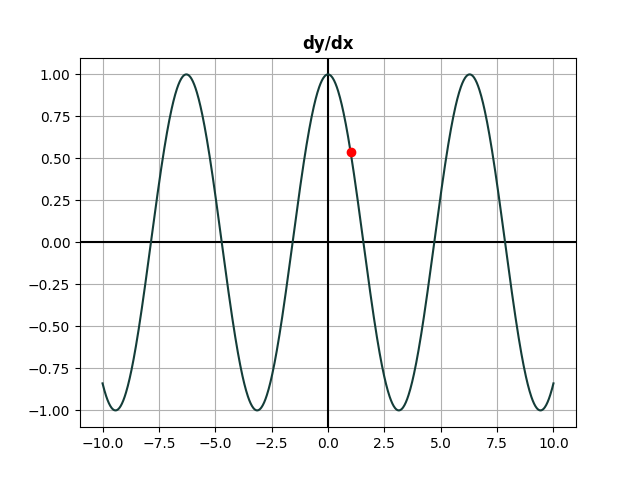

In [7]:
# f(x)
plot_points(x, y, "y = f(x)")

# Tangent line
p = 1.0
p = torch.tensor(p).requires_grad_(True)
f_p = f(p)
tan_line = [p.grad * point - p.grad * p + f_p for point in x]
plt.plot(x, tan_line)
plt.plot([p], [f_p], "ro")

# dy/dx
plot_points(x, dy_dx, "dy/dx")
plt.plot([p], [p.grad], "ro")

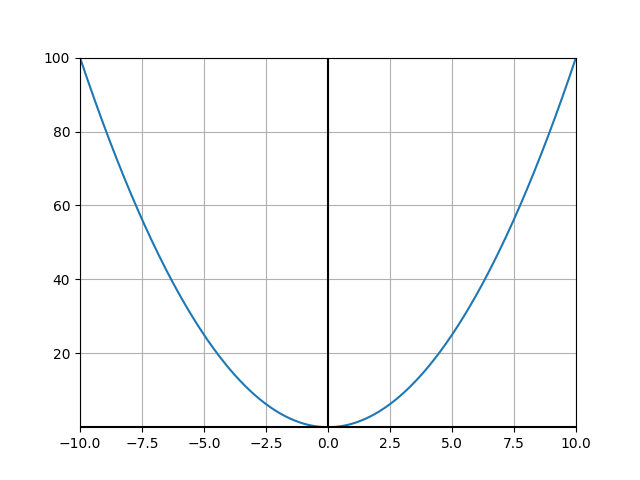

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y)
p_tan_line, = ax.plot([], "ro")
tan_line, = ax.plot([])

plt.grid()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y).data, max(y).data)

def animate(p):
    p_x, p_y, dp = p
    p_tan_line.set_data(([p_x], [p_y]))
    tan_line.set_data((x, [dp * point - dp * p_x + p_y for point in x]))
    return p_tan_line

anim = FuncAnimation(fig, animate, frames=zip(x, y, dy_dx), interval=1)
plt.show()